In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set style of visualization
sns.set_style("darkgrid")
sns.set_palette("RdBu")

In [2]:
data = pd.read_excel("Coffee Shop Sales.xlsx")
data.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [4]:
data.duplicated().any()

False

In [5]:
columnValue = data.nunique().reset_index()

# 2- rename column name 
columnValue.rename(columns = {"index" : "Column _name", 0 : "Uniue values"}, inplace = True)

# 3- see columns and number of unique values of each
columnValue

,Column _name,Uniue values
0,transaction_id,149116
1,transaction_date,181
2,transaction_time,25762
3,transaction_qty,6
4,store_id,3
5,store_location,3
6,product_id,80
7,unit_price,41
8,product_category,9
9,product_type,29


In [6]:
data.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [7]:
data.describe(include = object)

,transaction_time,store_location,product_category,product_type,product_detail
count,149116,149116,149116,149116,149116
unique,25762,3,9,29,80
top,09:31:15,Hell's Kitchen,Coffee,Brewed Chai tea,Chocolate Croissant
freq,41,50735,58416,17183,3076


In [8]:
data.drop(columns = ["transaction_id", "store_id", "product_id"], inplace = True)

In [9]:
def count_plot(x_axis = None, y_axis = None, hue = None, rotation = 0, top = None):
    if x_axis: # if we neet to visualized in x-axis
        order = data[x_axis].value_counts().iloc[:top].index
        
    else : # if we neet to visualized in y-axis
        order = data[y_axis].value_counts().iloc[:top].index
        
    graph = sns.countplot(x = x_axis, y = y_axis, data = data, hue = hue, order = order, palette = "RdBu")
    for container in graph.containers:
        graph.bar_label(container)
        
        
    plt.xticks(rotation = rotation)
    plt.show()

In [10]:
def pie_plot(column_name, explodeIndex = None):
    # Create explode list with zeros of size equal to the number of unique values
    explodeList = [0] * data[column_name].nunique()
    
    # Check and set explodeIndex value 
    if explodeIndex is not None:
        explodeList[explodeIndex] = 0.1
    
    # Create pie plot
    plt.pie(data[column_name].value_counts(), labels = data[column_name].value_counts().index, shadow = True, autopct = "%1.1f%%",  explode = explodeList)
    plt.show()

In [11]:
data["transaction_date"].unique()[:25]

<DatetimeArray>
['2023-01-01 00:00:00', '2023-01-02 00:00:00', '2023-01-03 00:00:00',
 '2023-01-04 00:00:00', '2023-01-05 00:00:00', '2023-01-06 00:00:00',
 '2023-01-07 00:00:00', '2023-01-08 00:00:00', '2023-01-09 00:00:00',
 '2023-01-10 00:00:00', '2023-01-11 00:00:00', '2023-01-12 00:00:00',
 '2023-01-13 00:00:00', '2023-01-14 00:00:00', '2023-01-15 00:00:00',
 '2023-01-16 00:00:00', '2023-01-17 00:00:00', '2023-01-18 00:00:00',
 '2023-01-19 00:00:00', '2023-01-20 00:00:00', '2023-01-21 00:00:00',
 '2023-01-22 00:00:00', '2023-01-23 00:00:00', '2023-01-24 00:00:00',
 '2023-01-25 00:00:00']
Length: 25, dtype: datetime64[ns]

In [12]:
# add new column year
data["year"] = data["transaction_date"].dt.year

# add new column month
data["month"] = data["transaction_date"].dt.month_name()

# add new column day
data["day"] = data["transaction_date"].dt.day_name()

/var/folders/mf/w11h1dkn0739lymqgkrpqcnh0000gn/T/ipykernel_32397/3459495922.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = x_axis, y = y_axis, data = data, hue = hue, order = order, palette = "RdBu")


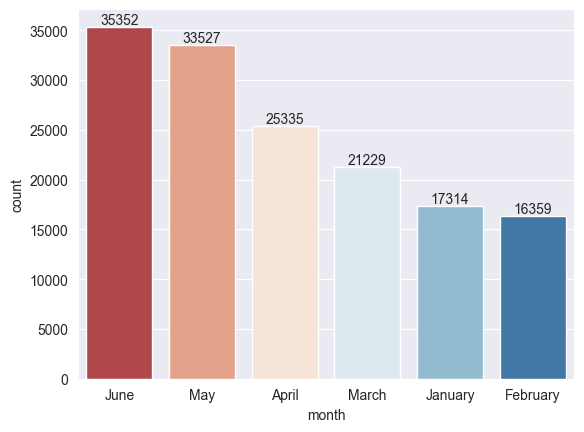

In [13]:
count_plot(x_axis = "month")

/var/folders/mf/w11h1dkn0739lymqgkrpqcnh0000gn/T/ipykernel_32397/3459495922.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = x_axis, y = y_axis, data = data, hue = hue, order = order, palette = "RdBu")


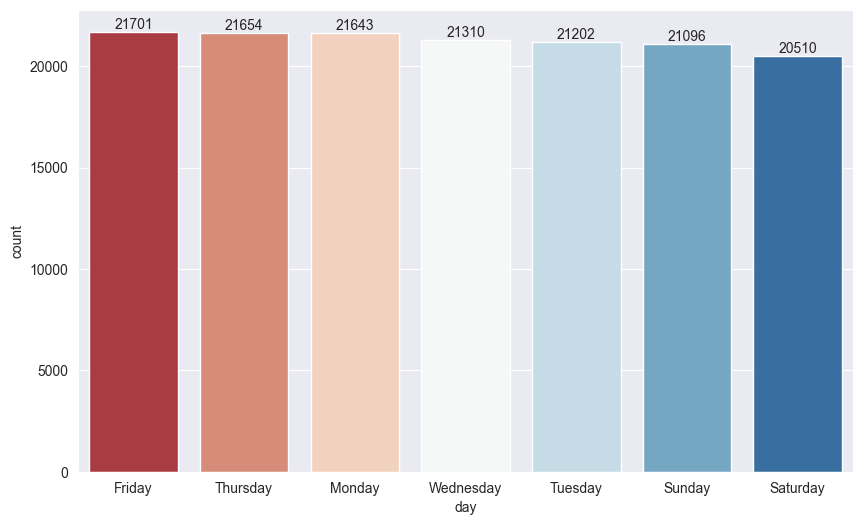

In [14]:
plt.figure(figsize = (10,6))
count_plot(x_axis = "day")

In [15]:
data.drop(columns = "transaction_date", inplace = True)

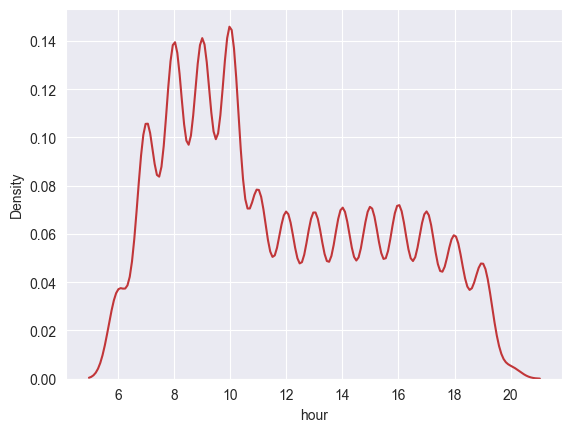

In [16]:
data["hour"] = data["transaction_time"].apply(lambda x : x.hour)
sns.kdeplot(data["hour"])
plt.show()

/var/folders/mf/w11h1dkn0739lymqgkrpqcnh0000gn/T/ipykernel_32397/3459495922.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = x_axis, y = y_axis, data = data, hue = hue, order = order, palette = "RdBu")


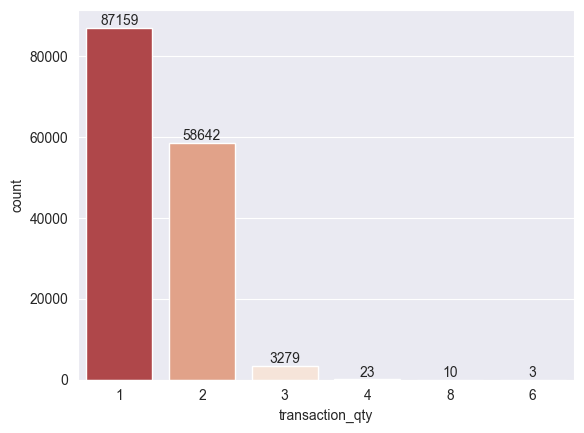

In [17]:
data.drop(columns = "transaction_time", inplace = True)
count_plot(x_axis = "transaction_qty")

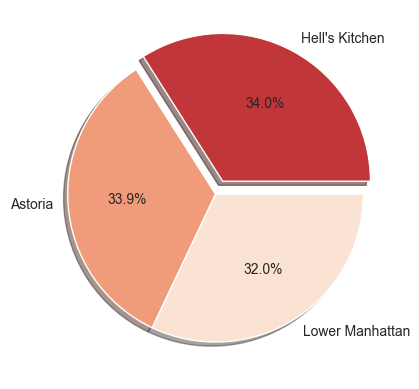

In [18]:
pie_plot(column_name = "store_location", explodeIndex = 0)

<Axes: ylabel='unit_price'>

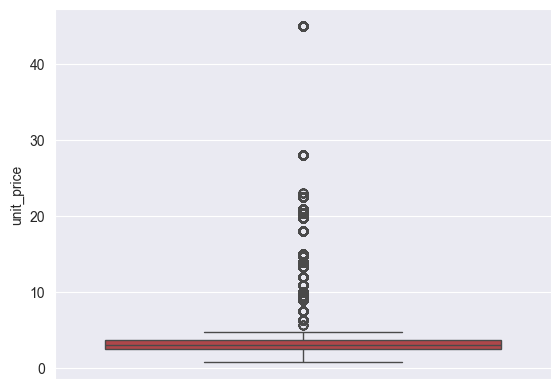

In [19]:
sns.boxplot(y = "unit_price", data = data)

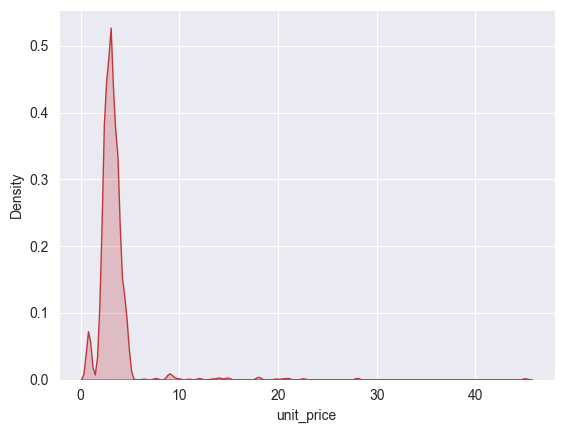

In [20]:
# see distribution

sns.kdeplot(x = data["unit_price"], fill = True)
plt.show()

/var/folders/mf/w11h1dkn0739lymqgkrpqcnh0000gn/T/ipykernel_32397/3459495922.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = x_axis, y = y_axis, data = data, hue = hue, order = order, palette = "RdBu")


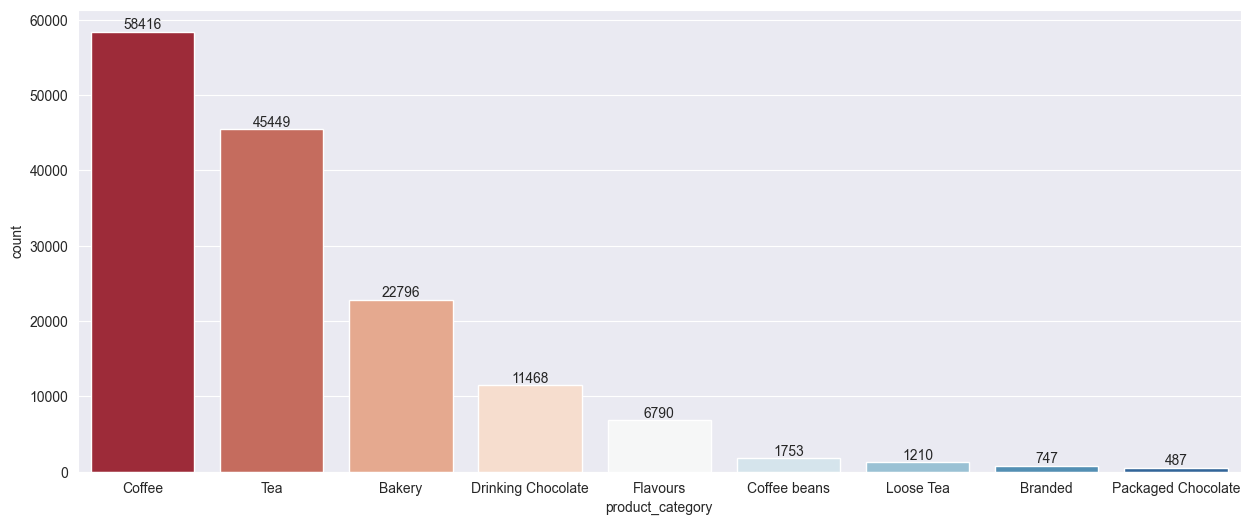

In [21]:
plt.figure(figsize = (15,6))

count_plot(x_axis = "product_category")  

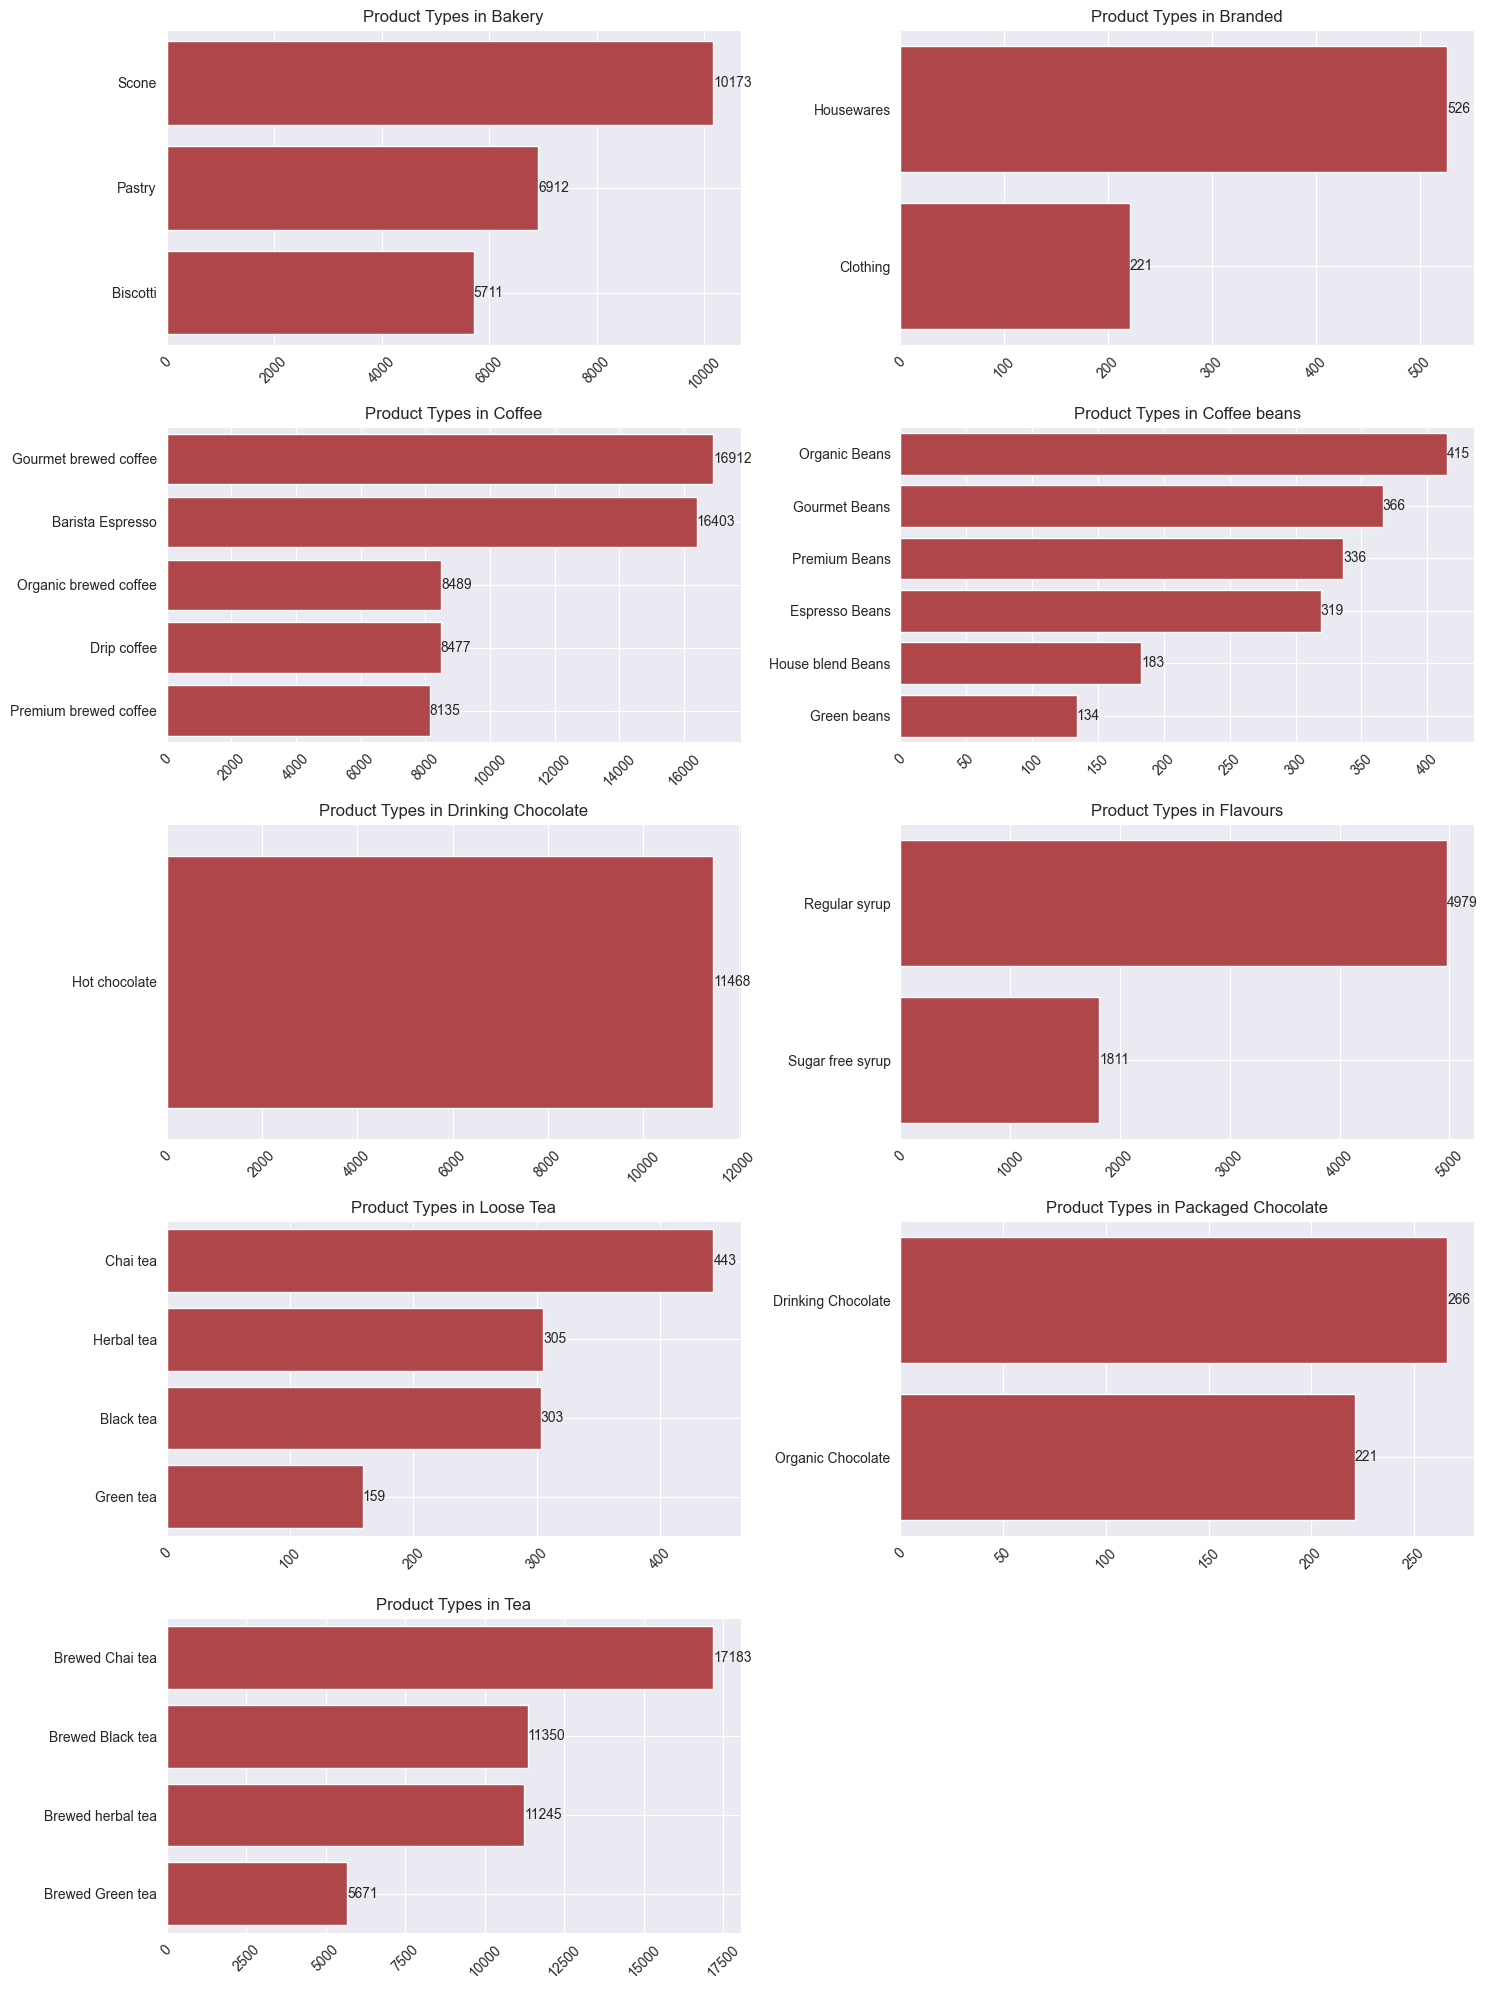

In [22]:
counts = data.groupby(["product_category", "product_type"]).size().reset_index(name = "count")

# Get unique categories
categories = counts['product_category'].unique()

# Create subplots for each category in a 4x2 grid
fig, axes = plt.subplots(5, 2, figsize = (15, 20))

# Flatten the axes for easier iteration
axes = axes.flatten()

for i, category in enumerate(categories):
    # Filter data for each category
    subset = counts[counts['product_category'] == category]
    
    # Sort the data by 'count' column in descending order
    subset = subset.sort_values('count', ascending = False)
    
    # Create a bar plot for each category with sorted order
    sns.barplot(x = 'count', y = 'product_type', data = subset, ax = axes[i], order = subset['product_type'])
    axes[i].set_title(f'Product Types in {category}')
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis = 'x', rotation = 45)
    axes[i].grid(True)
    
    # Adding bar labels
    for idx, bar in enumerate(axes[i].patches):
        axes[i].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, subset.iloc[idx]['count'], ha = 'left', va = 'center')

# Hide extra subplots if there are fewer categories than subplots
for j in range(len(categories), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

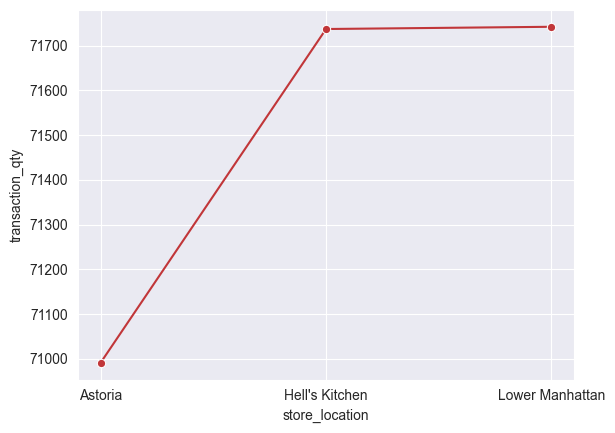

In [23]:
data.drop(columns = "product_detail", inplace = True)
data["Total revenue"] = data["transaction_qty"] * data["unit_price"]
sum_transaction_qty = data.groupby("store_location")["transaction_qty"].sum().reset_index()

# create line plot
sns.lineplot(x = "store_location", y = "transaction_qty", data = sum_transaction_qty, marker = "o")
plt.show()


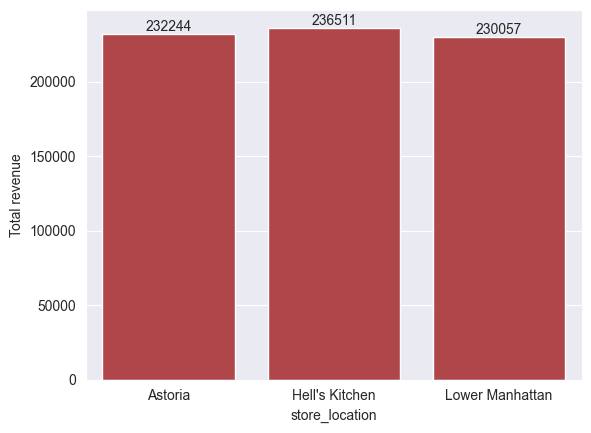

In [24]:
revenue = data.groupby("store_location")["Total revenue"].sum().reset_index()

# create bar plot
ax = sns.barplot(x = "store_location", y = "Total revenue", data = revenue)

# Adding labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
                xytext = (0, 5), textcoords = 'offset points')
    
plt.show()

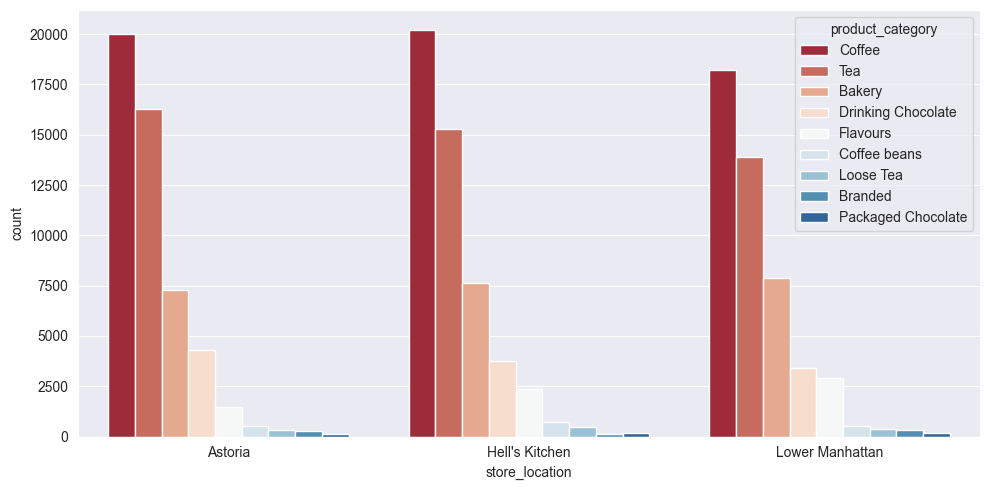

In [25]:
popular_products = data.groupby('store_location')[['product_category']].value_counts().reset_index(name='count')

# set figure size
plt.figure(figsize=(10, 5))

# Create a bar plot 
sns.barplot(x = 'store_location', y = 'count', hue = 'product_category', data = popular_products, palette = "RdBu")

plt.tight_layout()
plt.show()